In [36]:
import json
import pandas as pd
from tqdm import tqdm

In [37]:
# KNU 한국어 감성사전 파일 읽어오기
SentiWord = pd.read_json('./data/SentiWord_info.json')
SentiWord.head(20)
SentiWord.tail(20)

,word,word_root,polarity
14823,고리타분하다,고리타분,-1
14824,신통찮다,신통찮,-1
14825,심드렁하다,심드렁,-1
14826,지긋지긋하다,지긋지긋하,-2
14827,골치아프다,골치,-2
14828,기진맥진하다,기진맥진,-2
14829,꺼림찍하다,꺼리,-1
14830,찜찜하다,찜찜,-1
14831,꼴불견,꼴불견,-2
14832,넌더리나다,넌더리,-2


In [38]:
# SentiWord에 새로운 단어 추가 및 csv 형식으로 저장
SentiWord = SentiWord.append({"word":"알쏭", "word_root":"알쏭", "polarity" : -1}, ignore_index = True)
SentiWord.to_csv("./data/Sentiword_info.csv", index=False)
SentiWord.tail()

/var/folders/rt/5jvyxhl160n0wkcqnqvygf8m0000gn/T/ipykernel_66484/48732773.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SentiWord = SentiWord.append({"word":"알쏭", "word_root":"알쏭", "polarity" : -1}, ignore_index = True)


,word,word_root,polarity
14839,신비롭다,신비,1
14840,아리송하다,아리송,-1
14841,알쏭하다,알쏭하,-1
14842,알쏭달쏭하다,알쏭달쏭,-1
14843,알쏭,알쏭,-1


In [39]:
SentiWord.drop(14844)
SentiWord

KeyError: '[14844] not found in axis'

In [40]:
SentiWord = pd.read_csv("data/Sentiword_info.csv")
SentiWord

,word,word_root,polarity
0,(-;,(,1
1,(;_;),(;_;),-1
2,(^^),(^^),1
3,(^-^),(^-^),1
4,(^^*,(,1
...,...,...,...
14839,신비롭다,신비,1
14840,아리송하다,아리송,-1
14841,알쏭하다,알쏭하,-1
14842,알쏭달쏭하다,알쏭달쏭,-1


In [41]:
SentiWord.loc[len(SentiWord)] = ["합의", "합의",1]
SentiWord.loc[len(SentiWord)] = ["징용", "징용",-2]
SentiWord

,word,word_root,polarity
0,(-;,(,1
1,(;_;),(;_;),-1
2,(^^),(^^),1
3,(^-^),(^-^),1
4,(^^*,(,1
...,...,...,...
14841,알쏭하다,알쏭하,-1
14842,알쏭달쏭하다,알쏭달쏭,-1
14843,알쏭,알쏭,-1
14844,합의,합의,1


In [42]:
def pos_neg(word):
    tmp = SentiWord[(SentiWord['word'] == word) | (SentiWord['word_root'] == word)]
    try:
        word_res = (word, tmp['polarity'][tmp.index[0]])
    except:
        word_res = (word, 0)
    return word_res

In [43]:
word_res = pos_neg("합의")
print(word_res)

('합의', 1)


### 영화 리뷰 평가

In [44]:
move_df = pd.read_csv("./data/move_reple.csv")
move_df

,별점,리뷰,날짜
0,10,최근 본 영화중에 시계 안본 영화는 간만이네요. 시간이 순삭이네요,2021.11.24
1,10,"윤계상이 목숨 걸었다고 하던데, 확실히 액션이 돋보임. 카체이싱도 아찔하고. 박용우...",2021.11.24
2,8,시사회로 먼저 봤는데 난 재밌게 봄 배우들 연기도 좋고 마지막 액션씬도 좋았음 박지...,2021.11.24
3,10,"윤계상 연기 너무 잘하고, 액션도 시원시원하구 내용도 신선해서 재밌었음",2021.11.24
4,8,기대안하고 갔는디 생각보다 많이재밌었어요,2021.11.24
...,...,...,...
195,8,킬링타임용으로 볼만합니다 액션 좋고 배우들 연기 잘해요,2021.11.26
196,8,타격감있는 액션과 흥미로운 설정,2021.11.25
197,8,액션을 좋아하는 사람에게는 강추!!,2021.11.25
198,10,스토리가 재미있네요.. 새로운 접근..,2021.11.24


In [45]:
# 리뷰 하나의 텍스트로 만들기
text = ""
for i in move_df.index:
    text += str(df.loc[i, '리뷰']) + "\n"
print(text[:50])

최근 본 영화중에 시계 안본 영화는 간만이네요. 시간이 순삭이네요 
윤계상이 목숨 걸었다고


In [46]:
# Konlpy를 이용한  형태소 분석 진행후 morps에 저장
from konlpy.tag import Okt
okt  = Okt()

morps = okt.morphs(text)
morps

['최근',
 '본',
 '영화',
 '중',
 '에',
 '시계',
 '안',
 '본',
 '영화',
 '는',
 '간만',
 '이네',
 '요',
 '.',
 '시간',
 '이',
 '순삭',
 '이네',
 '요',
 '윤계상',
 '이',
 '목숨',
 '걸었다고',
 '하던데',
 ',',
 '확실히',
 '액션',
 '이',
 '돋보임',
 '.',
 '카체이싱',
 '도',
 '아찔하고',
 '.',
 '박용우',
 '오랜',
 '만',
 '에',
 '보는',
 '거',
 '같은데',
 ',',
 '연기',
 '쩌',
 '네',
 '.',
 '근데',
 '킬포',
 '는',
 '노숙자',
 '박지환',
 '이라는',
 '거',
 '!',
 '시사회',
 '로',
 '먼저',
 '봤는데',
 '난',
 '재밌게',
 '봄',
 '배우',
 '들',
 '연기',
 '도',
 '좋고',
 '마지막',
 '액션씬',
 '도',
 '좋았음',
 '박지환',
 '배우',
 '랑',
 '윤계상',
 '배우',
 '깐',
 '부로',
 '만나서',
 '더',
 '좋았음',
 'ㅋㅋㅋ',
 '윤계상',
 '연기',
 '너무',
 '잘',
 '하고',
 ',',
 '액션',
 '도',
 '시원시원하구',
 '내용',
 '도',
 '신선해서',
 '재밌었음',
 '기',
 '대안',
 '하고',
 '갔는디',
 '생각',
 '보다',
 '많이',
 '재밌었어요',
 '핫도그',
 '가',
 '생각난다',
 '..',
 '윤계상',
 '존멋',
 '공간',
 '바뀔',
 '때',
 '무빙',
 '지',
 '린다',
 '몸',
 '사리',
 '지',
 '않는',
 '액션',
 'bb',
 '윤계상',
 '과',
 '액션',
 '만으로도',
 '꽉',
 '채워지는',
 '2시간',
 '의외로',
 '기대',
 '이상',
 '이었던',
 '액션',
 '윤계상',
 '이란',
 '배우',
 '가',
 '팍',
 '각인',
 '되는',
 '영화',
 '액션',
 '연기',
 '난

In [47]:
from tqdm import tqdm

pos_list = []  # 긍정 단어
neg_list = []  #  부정 단어
unkwon_list = []  #  중립 단어
for noun in tqdm(morps, '긍/부정 나누기'):
    word_res = pos_neg(noun)
    if word_res[1] > 0:
        pos_list.append(word_res[0])
    elif word_res[1] < 0:
        neg_list.append(word_res[0])
    else:
        unkwon_list.append(word_res[0])



긍/부정 나누기: 100%|██████████| 2887/2887 [00:07<00:00, 375.08it/s]


In [48]:
print(f"긍정 키워드 건수:{len(pos_list)} 개")
print(f"부정 키워드 건수:{len(neg_list)} 개")
print(f"중립 키워드 건수:{len(unkwon_list)} 개")

긍정 키워드 건수:196 개
부정 키워드 건수:270 개
중립 키워드 건수:2421 개


In [57]:
stop_words = "것 넘 점 ( 와 히 로 위 시 사람 순 타 보 열 ) 이 때 급 저 아 가"
stop_words = stop_words.split()

newPos_list = []

for w in pos_list:
    if w not in stop_words:
        newPos_list.append(w)
        
newPos_list[:50]

['좋고',
 '잘',
 '기대',
 '수습',
 '수습',
 '수습',
 '기대',
 '수습',
 '짝',
 '기대',
 '시원한',
 '믿고',
 '안정',
 '잘',
 '멋지다',
 '기대',
 '하드캐리',
 '잘',
 '믿고',
 '보람',
 '잘',
 '시원하다',
 '시원한',
 '시원한',
 '용',
 '개',
 '애정',
 '최고',
 '기대',
 '기대',
 '좋게',
 '잘',
 '캐리',
 '훌륭하고',
 '신',
 '높은',
 '끌',
 '재미있다',
 '잘',
 '좋은',
 '좋고',
 '좋고',
 '잘',
 '화려하고',
 '새로운',
 '좋고',
 '만족',
 '좋음',
 '잘',
 '충분']

In [56]:
newNeg_list = []
for w in neg_list:
    if len(w) > 1:
        newNeg_list.append(w)
        
newNeg_list[:50]

['노숙자',
 '이상',
 '걱정',
 'ㅠㅠ',
 '정신없이',
 '범죄',
 '아플',
 '스트레스',
 '범죄',
 '이상',
 '장난',
 '황당한',
 '억지로',
 '억지로',
 '범죄',
 'ㅠㅠ',
 '때려',
 '스포',
 '불만족',
 '일부러',
 '스트레스',
 '어설픈',
 '이야기',
 '노숙자',
 '후회',
 'ㅠㅠ',
 '급하게',
 '범죄',
 '후회',
 '이야기',
 '범죄',
 '이상',
 '이상',
 '이상',
 '부족',
 '무시',
 '도둑',
 '미친',
 '소름',
 '깜놀']

In [61]:
from collections import Counter

Counter(newPos_list)['높은']

3

In [66]:
pos_count = dict(Counter(newPos_list).most_common()) # 단어별 빈도수 계산 후 내림차순 정렬
neg_count = dict(Counter(newNeg_list).most_common()) # 단어별 빈도수 계산 후 내림차순 정렬

In [67]:
pos_count
neg_count

{'이상': 5,
 '범죄': 5,
 'ㅠㅠ': 3,
 '노숙자': 2,
 '스트레스': 2,
 '억지로': 2,
 '이야기': 2,
 '후회': 2,
 '걱정': 1,
 '정신없이': 1,
 '아플': 1,
 '장난': 1,
 '황당한': 1,
 '때려': 1,
 '스포': 1,
 '불만족': 1,
 '일부러': 1,
 '어설픈': 1,
 '급하게': 1,
 '부족': 1,
 '무시': 1,
 '도둑': 1,
 '미친': 1,
 '소름': 1,
 '깜놀': 1}

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [69]:
img_path = "./data/good.jpg"
img = Image.open(img_path)
img.size

(831, 789)

In [96]:
cloud_mask = np.array(Image.open(img_path))
print(cloud_mask.shape)
#print(cloud_mask)

(789, 831, 3)


## 색상 참조: 

In [97]:
def color_func1(**kawargs):
    color="#0b13f0"
    return color

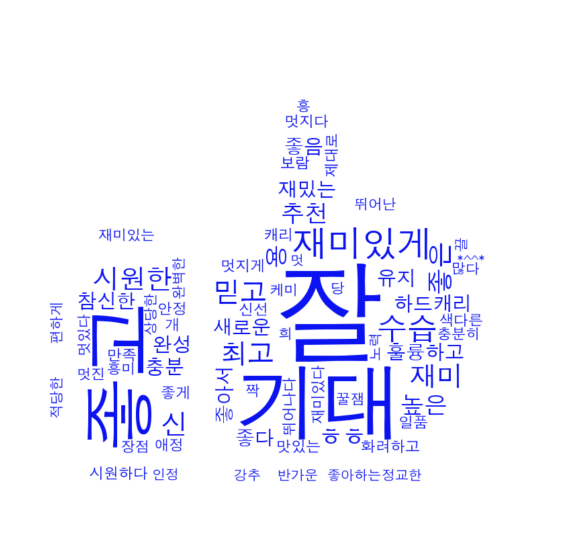

In [98]:
wordcloud = WordCloud(font_path = "AppleGothic", background_color = "white", mask = cloud_mask)

wc = wordcloud.generate_from_frequencies(pos_count)
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func = color_func1), interpolation = 'bilinear')
plt.axis("off")
plt.show()

(789, 831, 3)


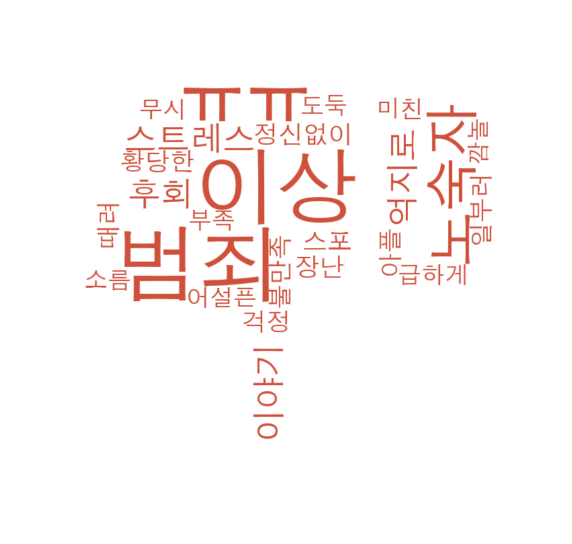

In [89]:
# 부정을 워드클라우드로 출력
cloud_mask = np.array(Image.open('./data/bad.jpg'))
print(cloud_mask.shape)

wordcloud = WordCloud(font_path = "AppleGothic", background_color = "white", mask = cloud_mask)

wc = wordcloud.generate_from_frequencies(neg_count)
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func = color_func1), interpolation = 'bilinear')
plt.axis("off")
plt.show()